PIB,IPC,BalanzaPagos,Desemp1000,DeudaGobMill,DefSupPublMill,IngresosImpMill,ÍndConfianzaConsum,TasaInterés,ExportMill,ImportMill,CréditCasaMill,DeudaPrivMill,ConsumFinHogEmprMill,GastoFinGobMill,TasaAhorroHogr
708836.2,94.10,-5125.52,3083,1654381,-28810.74,64632.52,3.67,4.75,250250.7,241396.6,336220.2,3736459,410242.3,335340.3,18.22
709626.1,94.97,-6629.15,3084,1645367,-351.82,70887.18,1.03,4.59,250156.4,239394.4,333146.8,3767458,409720.8,325572.5,14.80
707400.0,95.12,-2791.02,3141,1658148,-29028.24,68822.61,-7.07,4.27,247177.6,234718.1,332639.7,3781654,410729.4,333129.4,14.07
708764.4,95.08,14311.97,3216,1656126,-28735.85,67593.17,-11.47,3.44,253845.7,228522.4,332768.5,3777350,409813.5,371440.7,13.76
706340.8,95.99,11241.32,3294,1683854,-40521.97,66049.94,-12.00,3.36,249350.6,220774.8,337618.7,3791747,405816.4,335644.0,18.29
708351.6,96.20,9449.85,3383,1694020,-13683.05,66581.82,-9.60,3.45,255162.2,224620.2,336856.3,3846365,404267.9,328323.1,15.40


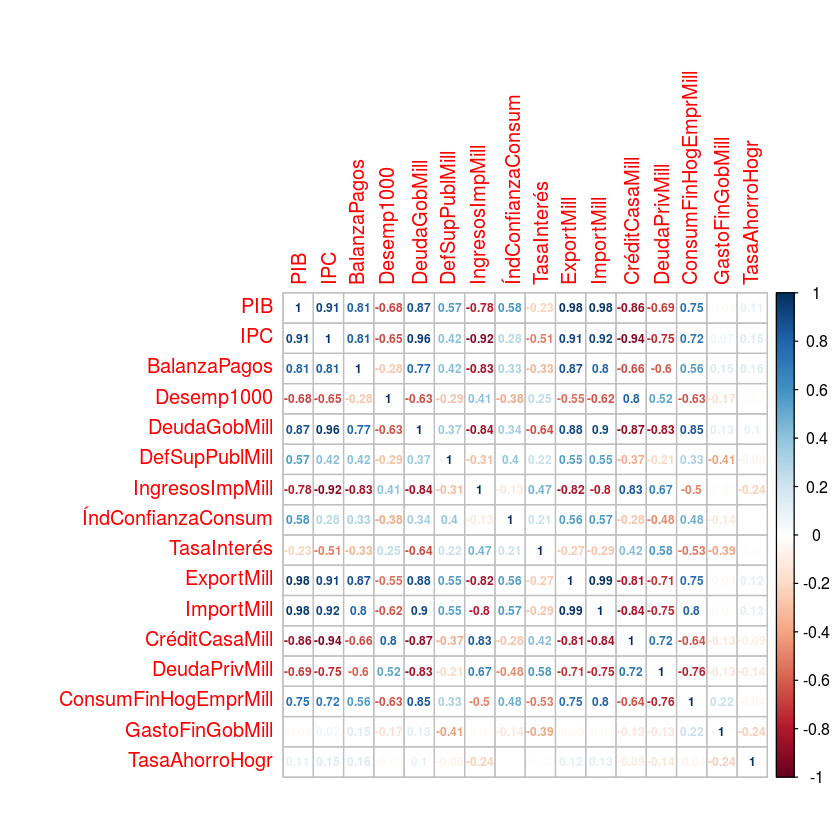

In [23]:
# Distancias entre Series temporales (económicas)

library(xts)
library(TSdist)
library(corrplot)

d <- read.csv("datos_Ger.csv")  # raw data

head(d)

dn <- apply(d, 2, function(x) x/max(abs(x)))  # data normalization
dates <- seq(as.Date("2001-03-01"), length = 48, by = "quarters")
vars <- xts(dn, order.by=dates)
cvars <- cor(vars)
corrplot(cvars, method="number", number.cex=0.6)

In [2]:
dcor<-TSDatabaseDistances(vars, distance='cor')
ddtw<-TSDatabaseDistances(vars, distance='dtw')
dccor<-TSDatabaseDistances(vars, distance='ccor')
deuc<-TSDatabaseDistances(vars, distance='euclidean')

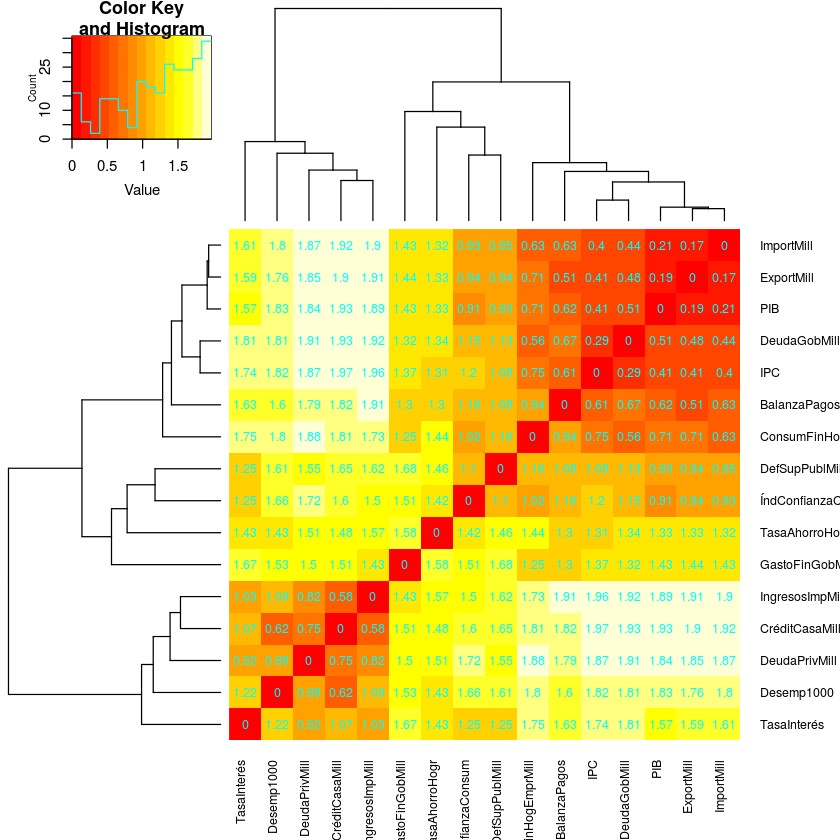

In [24]:
library(gplots)
m<-as.matrix(dcor); 
heatmap.2(m, cellnote=round(m, digits=2),
          trace='none', notecex = 0.75, cexRow = 0.75, cexCol = 0.75)

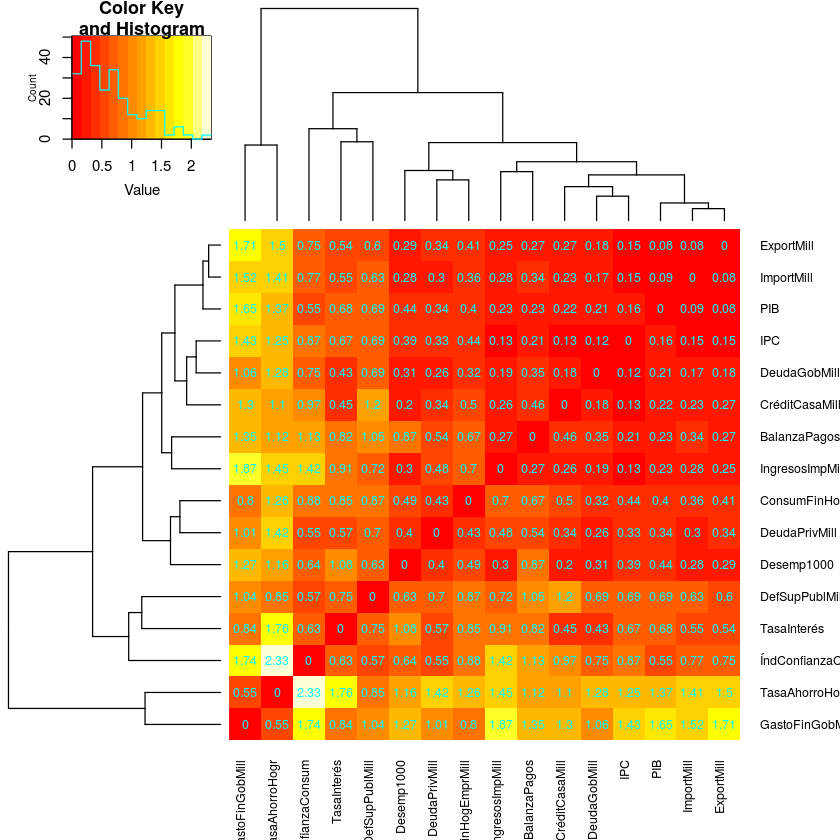

In [4]:
m<-as.matrix(dccor); heatmap.2(m, cellnote=round(m, digits=2), trace='none',
                               notecex = 0.75, cexRow = 0.75, cexCol = 0.75)

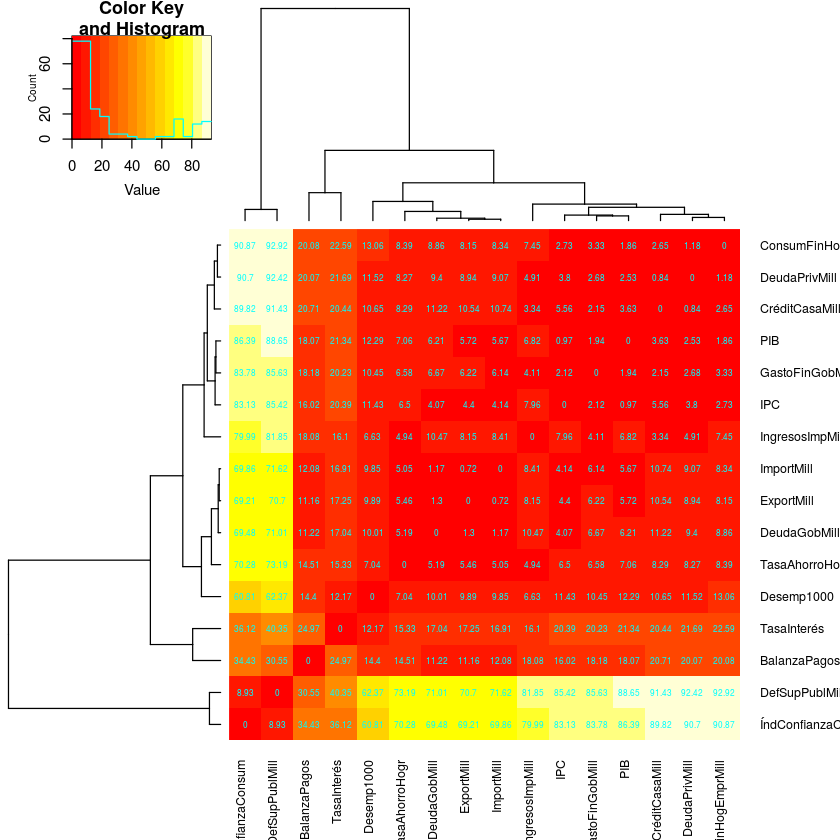

In [5]:
m<-as.matrix(ddtw); heatmap.2(m, cellnote=round(m, digits=2), trace='none',
                              notecex = 0.5, cexRow = 0.75, cexCol = 0.75)

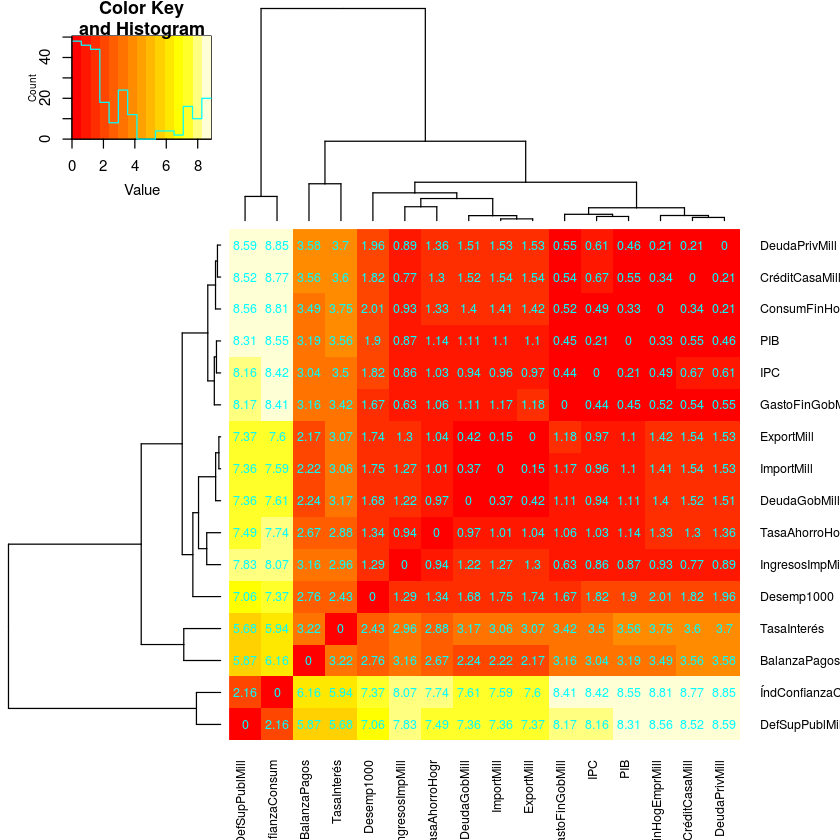

In [6]:
m<-as.matrix(deuc); heatmap.2(m, cellnote=round(m, digits=2), trace='none',
                              notecex = 0.75, cexRow = 0.75, cexCol = 0.75)

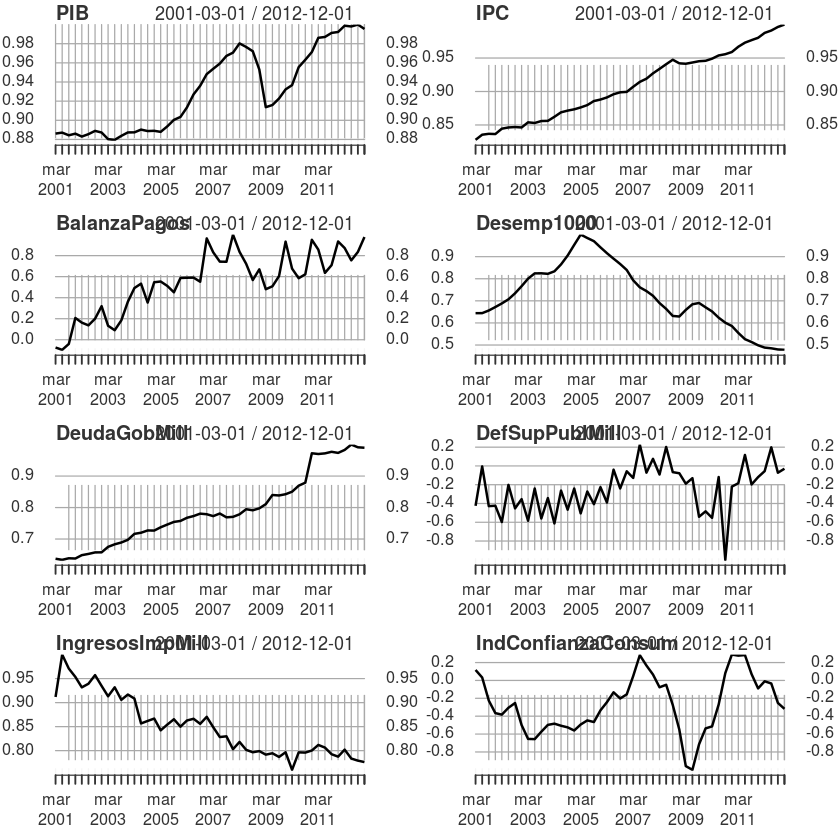

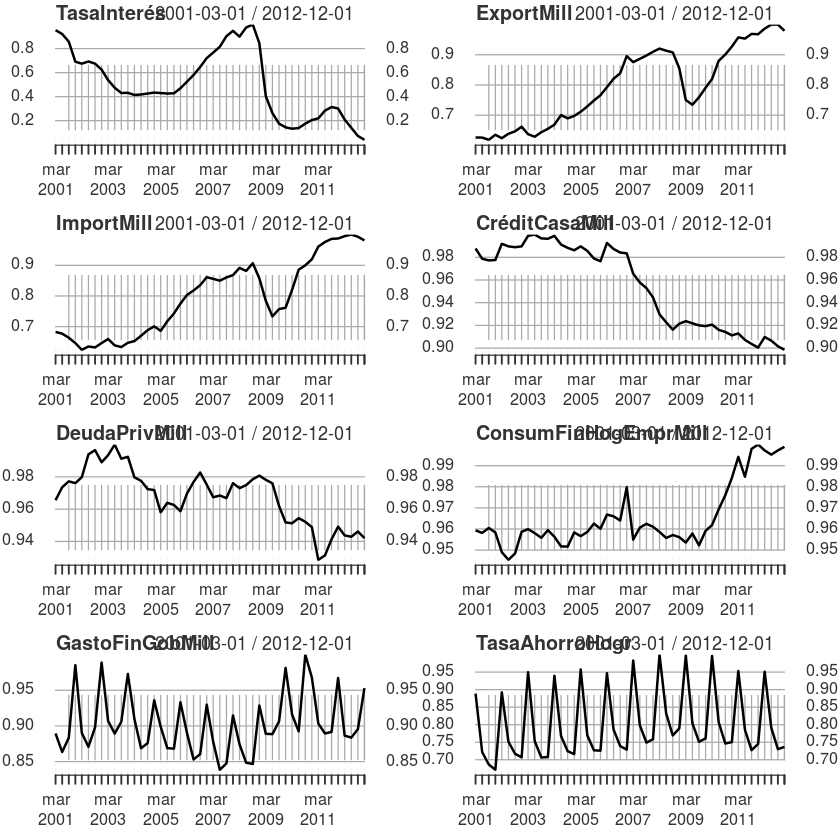

In [7]:
vars <- xts(dn, order.by=dates)
par(mfrow=c(4,2)) # Paneles en 4 filas 1 columna
for (i in 1:8) {
    print(plot(vars[,i], main = colnames(vars)[i]))
}
par(mfrow=c(4,2)) # Paneles en 4 filas 1 columna
for (i in 9:16) {
    print(plot(vars[,i], main = colnames(vars)[i]))
}

In [8]:
modelo1 <- lm(PIB ~ ., data=d)
summary(modelo1)


Call:
lm(formula = PIB ~ ., data = d)

Residuals:
    Min      1Q  Median      3Q     Max 
-3978.3 -1465.1     2.2  1085.6  4881.6 

Coefficients:
                       Estimate Std. Error t value Pr(>|t|)    
(Intercept)           2.462e+05  1.654e+05   1.488 0.146485    
IPC                   1.961e+03  1.030e+03   1.903 0.066093 .  
BalanzaPagos         -2.433e-02  8.474e-02  -0.287 0.775846    
Desemp1000           -7.330e+00  1.834e+00  -3.996 0.000354 ***
DeudaGobMill         -9.875e-03  1.218e-02  -0.811 0.423398    
DefSupPublMill       -4.512e-03  3.500e-02  -0.129 0.898235    
IngresosImpMill       3.427e-01  3.472e-01   0.987 0.331013    
ÍndConfianzaConsum    2.407e+02  1.159e+02   2.076 0.045963 *  
TasaInterés           2.028e+03  1.061e+03   1.911 0.065036 .  
ExportMill            6.484e-01  9.894e-02   6.554  2.2e-07 ***
ImportMill           -2.629e-01  1.023e-01  -2.570 0.015022 *  
CréditCasaMill       -6.804e-02  2.481e-01  -0.274 0.785650    
DeudaPrivMill       

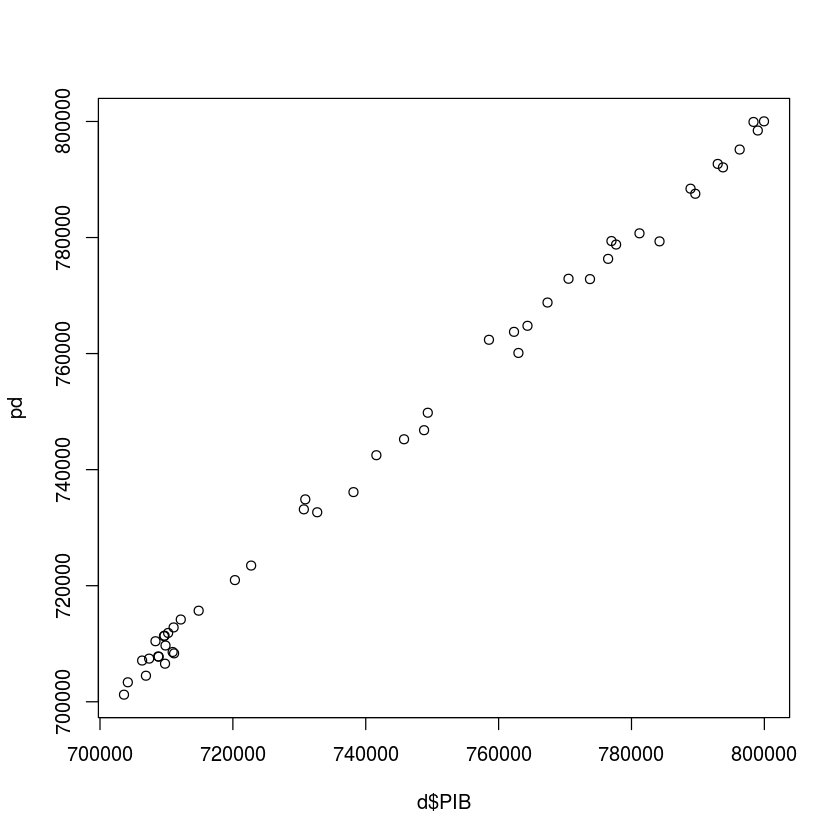

In [9]:
pd <- predict(modelo1, d)
plot(d$PIB, pd)

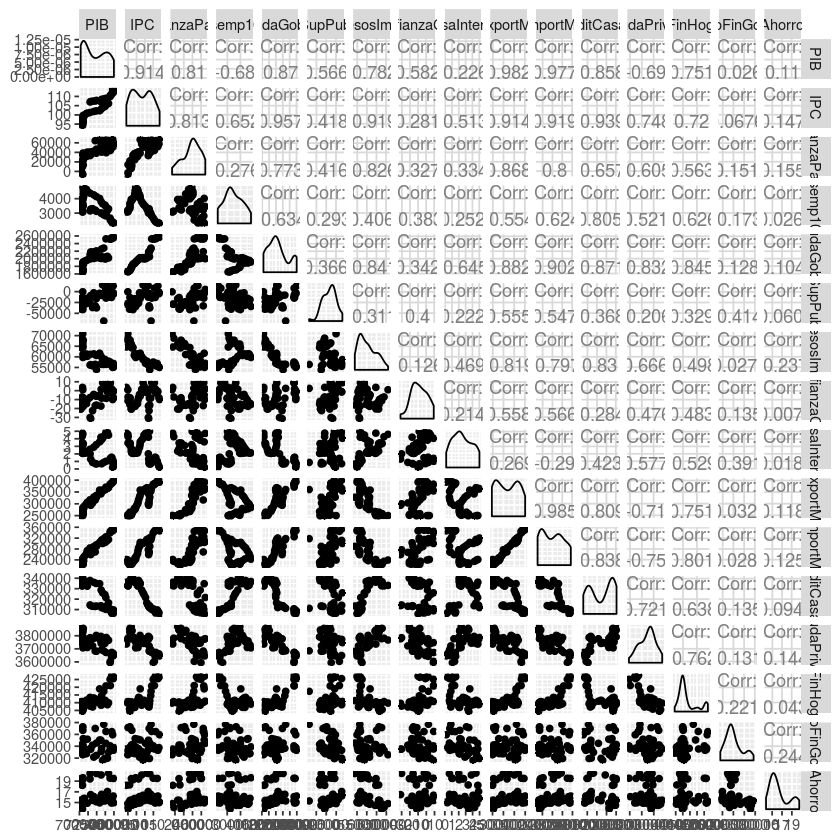

In [10]:
library(GGally)
ggpairs(d, lower = list(combo = wrap("facethist", binwidth = 0.2)))

Loading required package: lattice
Loading required package: ggplot2


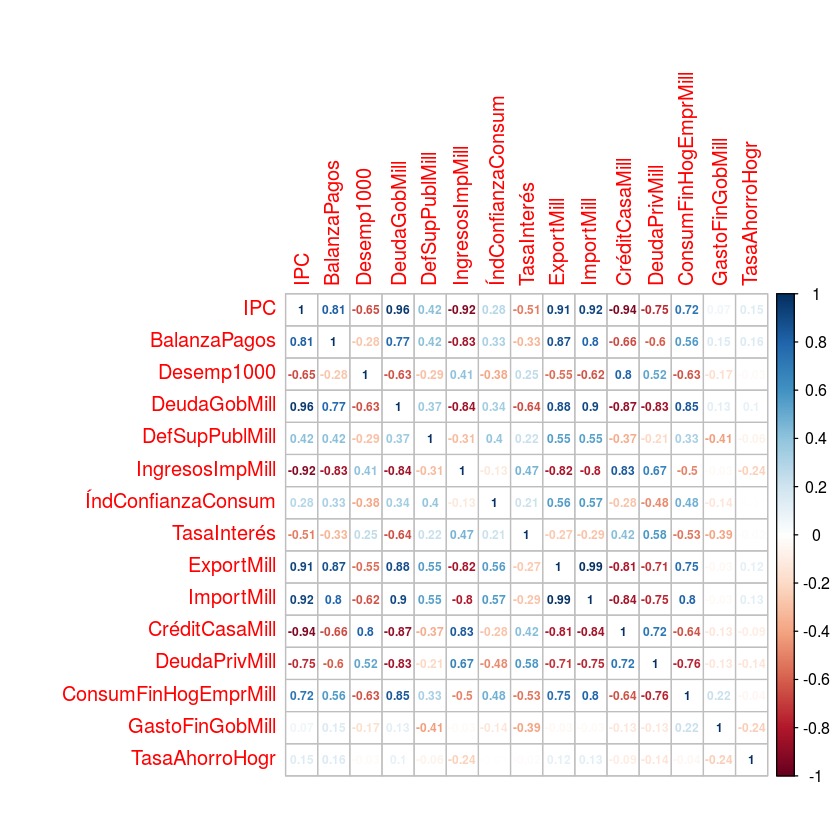

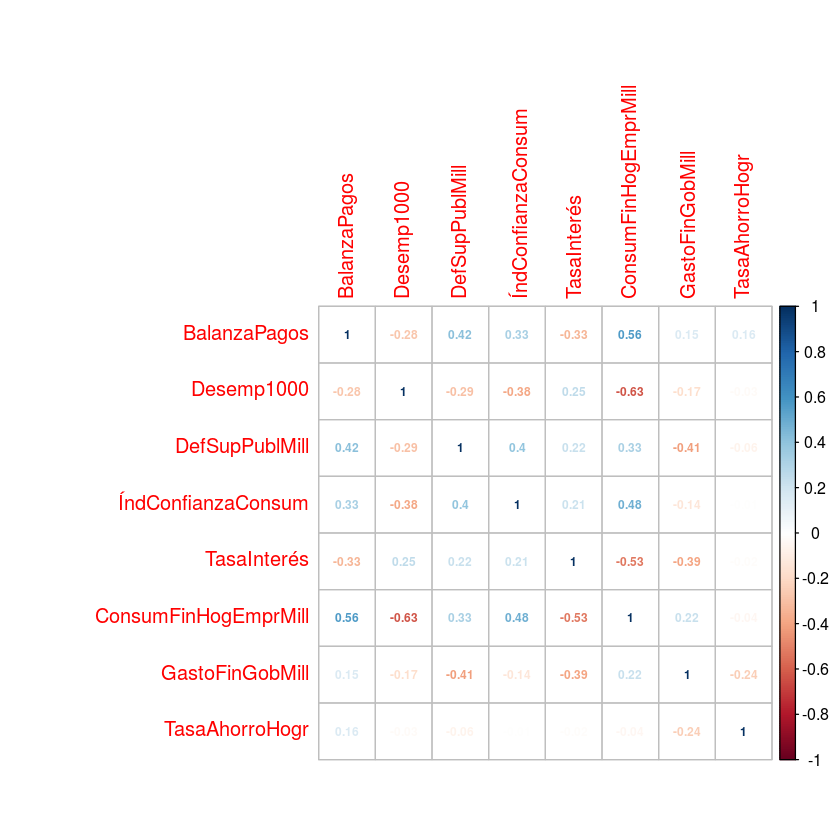

In [11]:
library('caret')

predictors = d[,2:16]
corr_pred = cor(predictors)
corrplot(corr_pred, method="number", number.cex=0.6)

hc = findCorrelation(corr_pred, cutoff=0.75)

hc = sort(hc)
reduced_pred = predictors[,-c(hc)]

corrplot(corr_pred[-hc,-hc], method="number", number.cex=0.6)

BalanzaPagos,Desemp1000,DefSupPublMill,ÍndConfianzaConsum,TasaInterés,ConsumFinHogEmprMill,GastoFinGobMill,TasaAhorroHogr,PIB
-5125.52,3083,-28810.74,3.67,4.75,410242.3,335340.3,18.22,708836.2
-6629.15,3084,-351.82,1.03,4.59,409720.8,325572.5,14.80,709626.1
-2791.02,3141,-29028.24,-7.07,4.27,410729.4,333129.4,14.07,707400.0
14311.97,3216,-28735.85,-11.47,3.44,409813.5,371440.7,13.76,708764.4
11241.32,3294,-40521.97,-12.00,3.36,405816.4,335644.0,18.29,706340.8
9449.85,3383,-13683.05,-9.60,3.45,404267.9,328323.1,15.40,708351.6


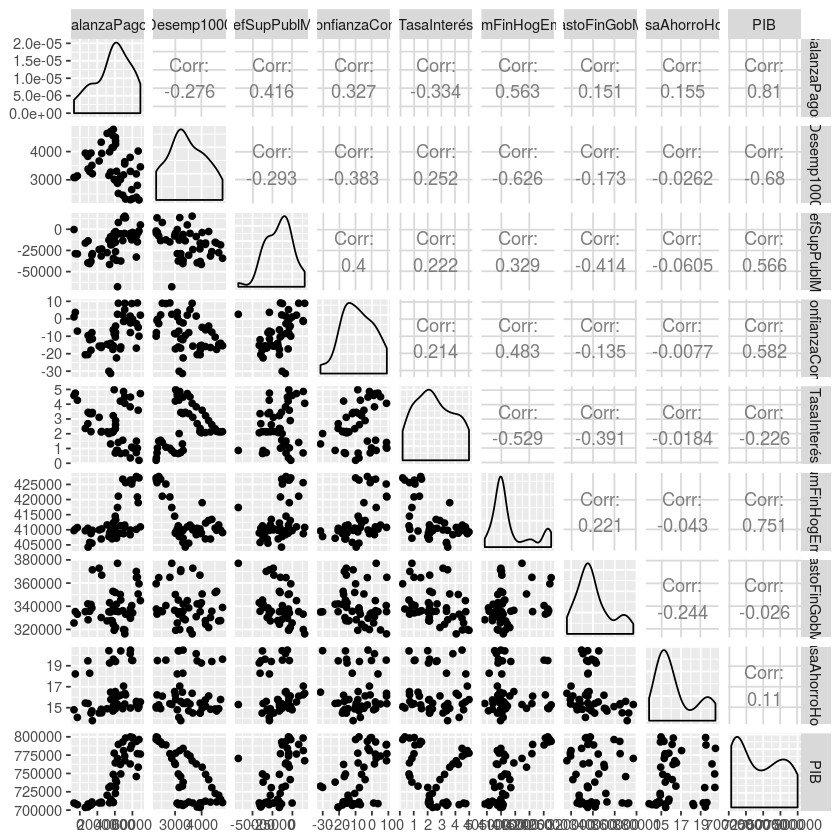

In [12]:
reduced_Data = reduced_pred

reduced_Data$PIB = d$PIB

head(reduced_Data)

ggpairs(reduced_Data, lower = list(combo = wrap("facethist", binwidth = 0.2)))

In [13]:
modelo2 <- lm(PIB ~ ., data=reduced_Data)
summary(modelo2)


Call:
lm(formula = PIB ~ ., data = reduced_Data)

Residuals:
     Min       1Q   Median       3Q      Max 
-14440.8  -4350.8    -86.1   5052.2  18363.1 

Coefficients:
                       Estimate Std. Error t value Pr(>|t|)    
(Intercept)           5.037e+05  1.476e+05   3.412  0.00152 ** 
BalanzaPagos          1.087e+00  7.962e-02  13.657  < 2e-16 ***
Desemp1000           -2.054e+01  2.100e+00  -9.781 4.77e-12 ***
DefSupPublMill       -8.757e-02  1.058e-01  -0.828  0.41293    
ÍndConfianzaConsum    2.398e+02  1.658e+02   1.446  0.15613    
TasaInterés           2.839e+03  1.360e+03   2.088  0.04340 *  
ConsumFinHogEmprMill  1.068e+00  3.411e-01   3.131  0.00329 ** 
GastoFinGobMill      -4.823e-01  9.957e-02  -4.844 2.05e-05 ***
TasaAhorroHogr       -7.924e+02  6.220e+02  -1.274  0.21022    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 7365 on 39 degrees of freedom
Multiple R-squared:  0.9609,	Adjusted R-squared:  0.9529 
F-statisti

In [14]:
library(MASS)

step <- stepAIC(modelo2, direction="both")
summary(step)

Start:  AIC=862.86
PIB ~ BalanzaPagos + Desemp1000 + DefSupPublMill + ÍndConfianzaConsum + 
    TasaInterés + ConsumFinHogEmprMill + GastoFinGobMill + TasaAhorroHogr

                       Df  Sum of Sq        RSS    AIC
- DefSupPublMill        1 3.7150e+07 2.1525e+09 861.70
- TasaAhorroHogr        1 8.8026e+07 2.2033e+09 862.82
<none>                               2.1153e+09 862.86
- ÍndConfianzaConsum    1 1.1343e+08 2.2287e+09 863.37
- TasaInterés           1 2.3640e+08 2.3517e+09 865.95
- ConsumFinHogEmprMill  1 5.3179e+08 2.6471e+09 871.63
- GastoFinGobMill       1 1.2725e+09 3.3879e+09 883.47
- Desemp1000            1 5.1891e+09 7.3044e+09 920.35
- BalanzaPagos          1 1.0116e+10 1.2231e+10 945.09

Step:  AIC=861.7
PIB ~ BalanzaPagos + Desemp1000 + ÍndConfianzaConsum + TasaInterés + 
    ConsumFinHogEmprMill + GastoFinGobMill + TasaAhorroHogr

                       Df  Sum of Sq        RSS    AIC
- TasaAhorroHogr        1 5.9959e+07 2.2124e+09 861.02
<none>                  


Call:
lm(formula = PIB ~ BalanzaPagos + Desemp1000 + ÍndConfianzaConsum + 
    TasaInterés + ConsumFinHogEmprMill + GastoFinGobMill, data = reduced_Data)

Residuals:
     Min       1Q   Median       3Q      Max 
-13509.6  -4859.5   -151.1   4648.3  20902.5 

Coefficients:
                       Estimate Std. Error t value Pr(>|t|)    
(Intercept)           4.760e+05  1.400e+05   3.400  0.00151 ** 
BalanzaPagos          1.035e+00  6.512e-02  15.894  < 2e-16 ***
Desemp1000           -1.979e+01  2.002e+00  -9.887 2.05e-12 ***
ÍndConfianzaConsum    2.690e+02  1.621e+02   1.659  0.10478    
TasaInterés           2.496e+03  1.211e+03   2.061  0.04573 *  
ConsumFinHogEmprMill  1.048e+00  3.216e-01   3.259  0.00225 ** 
GastoFinGobMill      -4.089e-01  7.670e-02  -5.331 3.85e-06 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 7346 on 41 degrees of freedom
Multiple R-squared:  0.9592,	Adjusted R-squared:  0.9532 
F-statistic: 160.5 on 6 and 41 DF

In [16]:
modelo3 <- lm(formula = PIB ~ BalanzaPagos + Desemp1000 + ÍndConfianzaConsum + 
    TasaInterés + ConsumFinHogEmprMill + GastoFinGobMill, data = reduced_Data)
summary(modelo3)


Call:
lm(formula = PIB ~ BalanzaPagos + Desemp1000 + ÍndConfianzaConsum + 
    TasaInterés + ConsumFinHogEmprMill + GastoFinGobMill, data = reduced_Data)

Residuals:
     Min       1Q   Median       3Q      Max 
-13509.6  -4859.5   -151.1   4648.3  20902.5 

Coefficients:
                       Estimate Std. Error t value Pr(>|t|)    
(Intercept)           4.760e+05  1.400e+05   3.400  0.00151 ** 
BalanzaPagos          1.035e+00  6.512e-02  15.894  < 2e-16 ***
Desemp1000           -1.979e+01  2.002e+00  -9.887 2.05e-12 ***
ÍndConfianzaConsum    2.690e+02  1.621e+02   1.659  0.10478    
TasaInterés           2.496e+03  1.211e+03   2.061  0.04573 *  
ConsumFinHogEmprMill  1.048e+00  3.216e-01   3.259  0.00225 ** 
GastoFinGobMill      -4.089e-01  7.670e-02  -5.331 3.85e-06 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 7346 on 41 degrees of freedom
Multiple R-squared:  0.9592,	Adjusted R-squared:  0.9532 
F-statistic: 160.5 on 6 and 41 DF

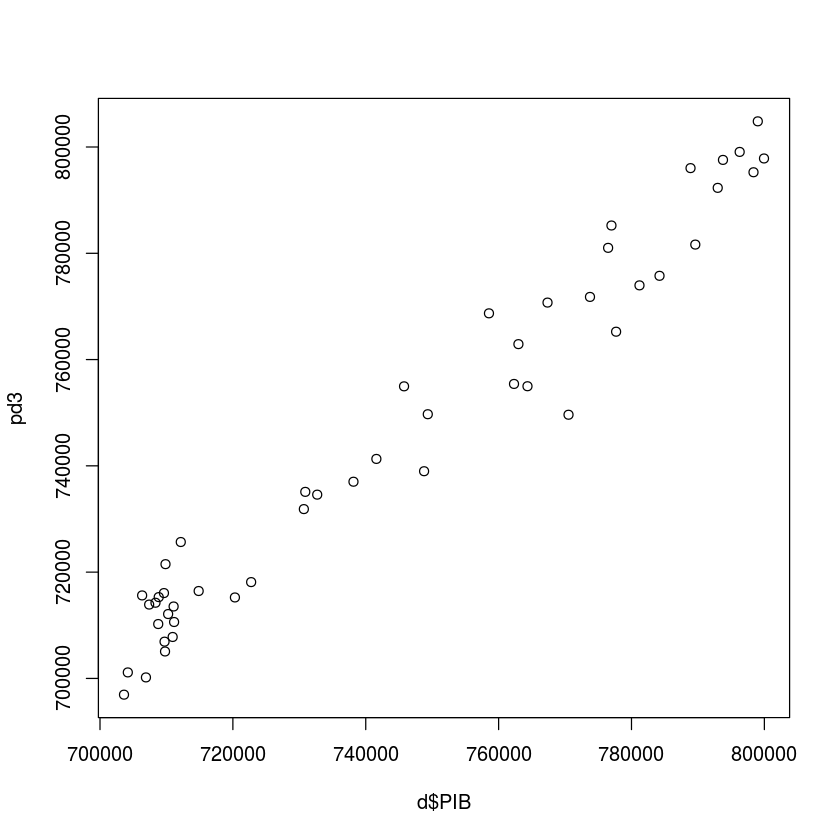

In [17]:
pd3 <- predict(modelo3, d)
plot(d$PIB, pd3)

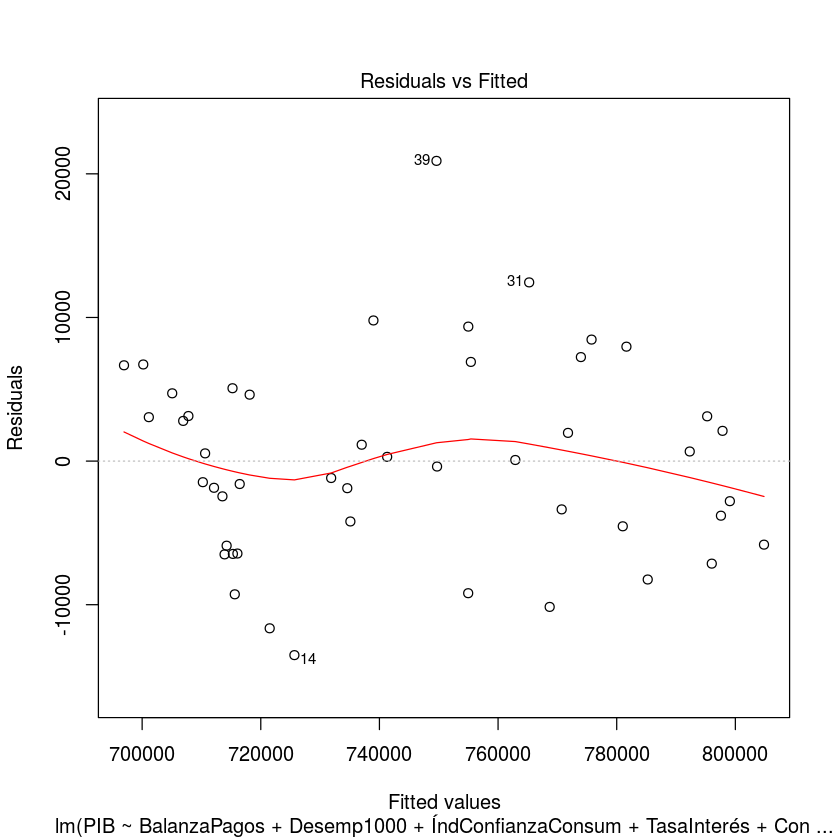

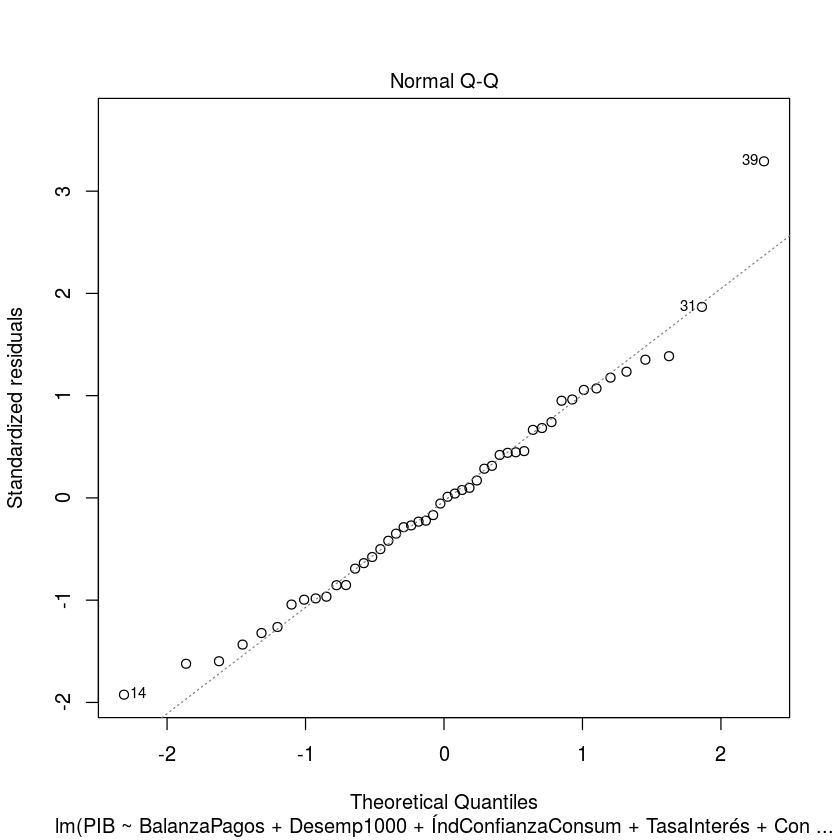

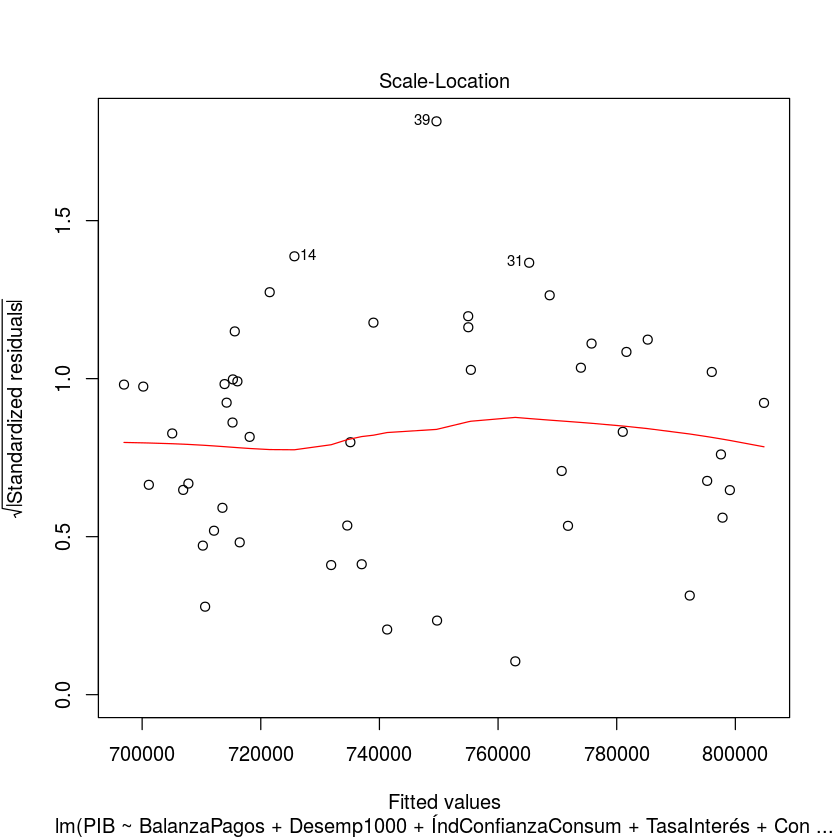

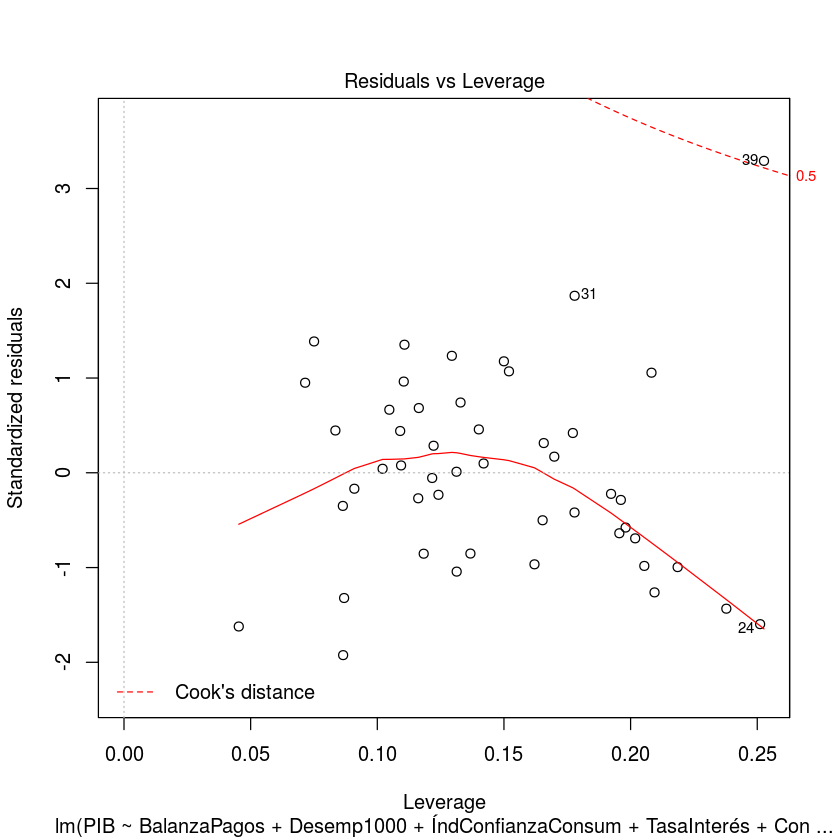

In [18]:
plot(modelo3)

randomForest 4.6-12
Type rfNews() to see new features/changes/bug fixes.

Attaching package: ‘randomForest’

The following object is masked from ‘package:ggplot2’:

    margin



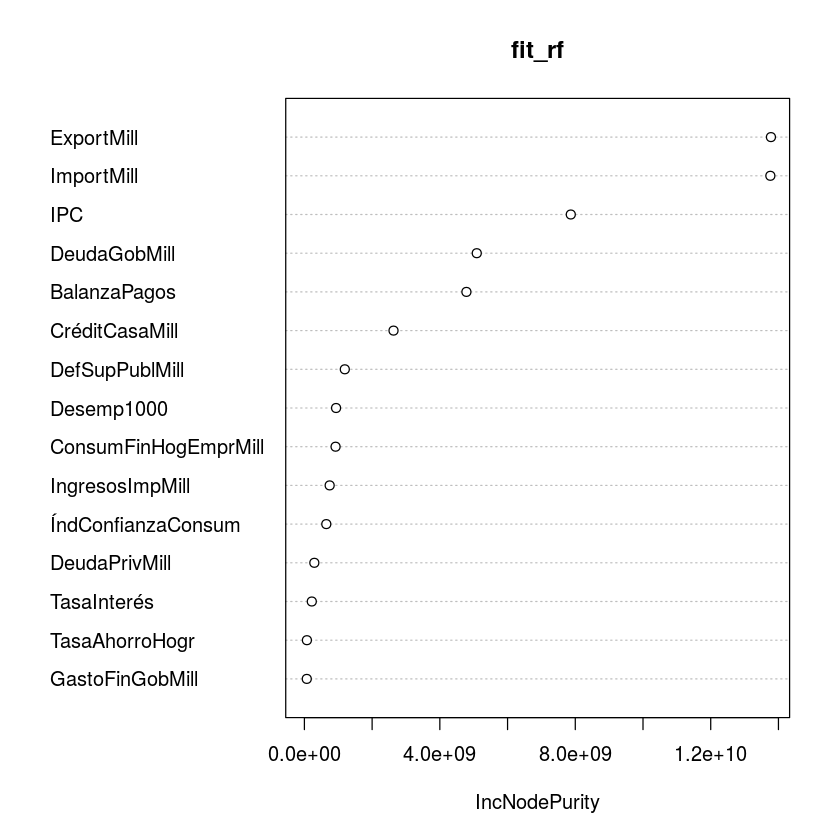

In [19]:
library(randomForest)

fit_rf <- randomForest(PIB~., data=d)
varImpPlot(fit_rf,type=2)

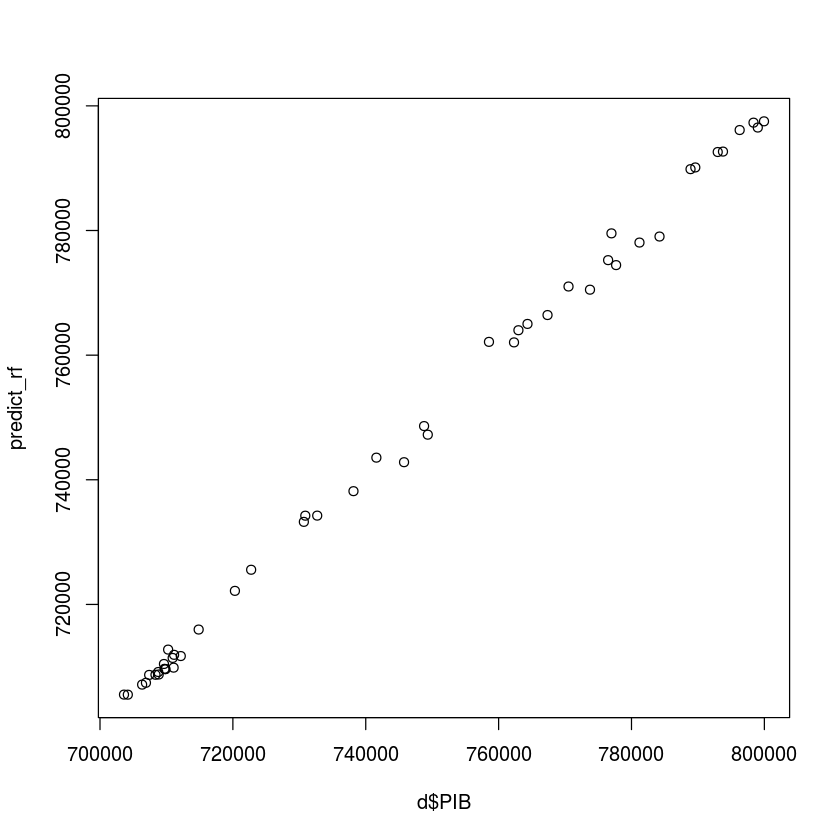

In [20]:
predict_rf <- predict(fit_rf, d)
plot(d$PIB, predict_rf)

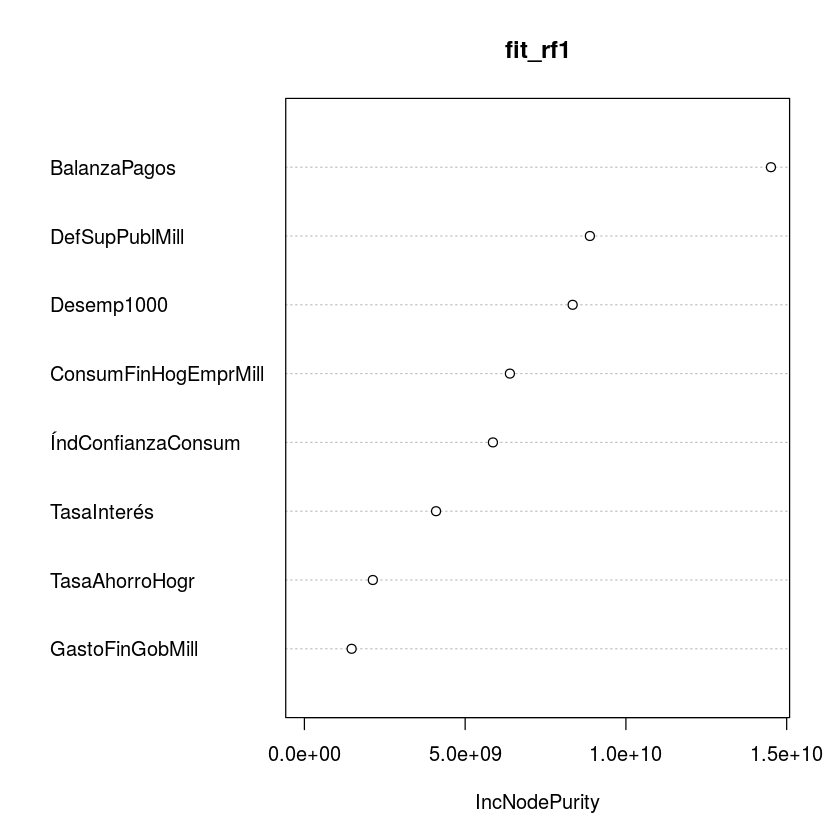

In [21]:
fit_rf1 <- randomForest(PIB~., data=reduced_Data)
varImpPlot(fit_rf1,type=2)

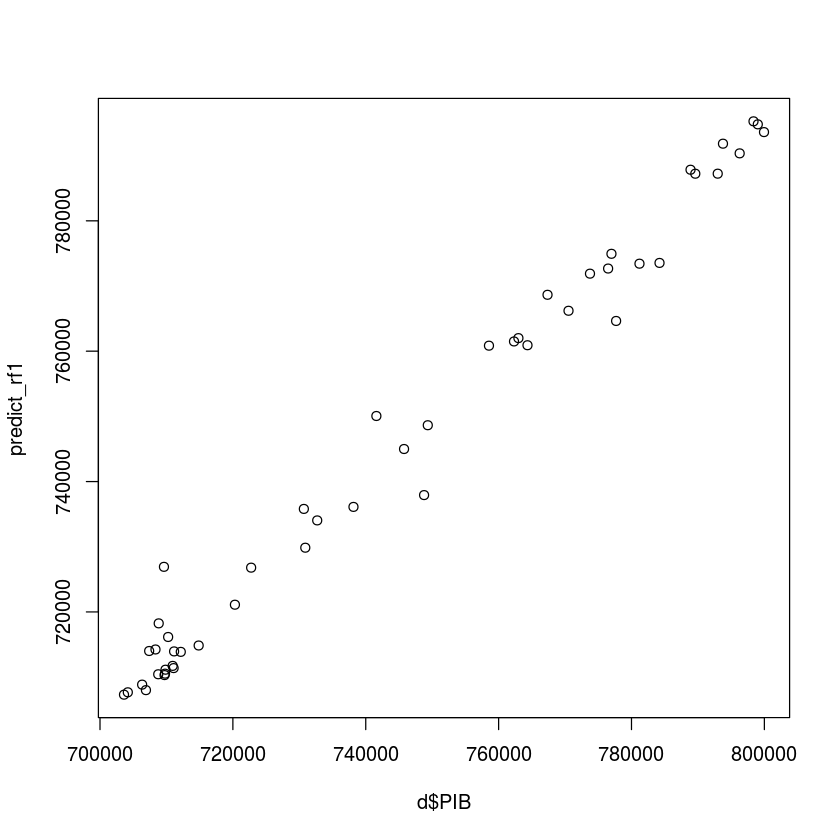

In [22]:
predict_rf1 <- predict(fit_rf1, d)
plot(d$PIB, predict_rf1)